In [79]:
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
import numpy as np
import layers
from sklearn.preprocessing import OneHotEncoder
import os

In [80]:
fashion = keras.datasets.fashion_mnist

In [81]:
(train_images, train_labels), (test_images, test_labels) = fashion.load_data()

# Preprocessing

In [82]:
b , h , w =  train_images.shape
train_images = train_images.reshape([b ,h , w ,1 ])
train_labels= train_labels.reshape((60000,1))

# Model

In [87]:
class Lenet :
    def __init__(self,images,labels,batch_size):
        self.learning_rate = 0.0002
        self.batch_size = batch_size
        self.images = images
        self.labels = labels
        
    def build_model(self):
        self.x = tf.placeholder(tf.float32, shape = [None, 28,28, 1])
        self.y = tf.placeholder(tf.uint8, shape = [None, 1])
        self.y_label = tf.one_hot(self.y,depth= 10)
        self.x_img = tf.image.resize_images(self.x, (32,32))
        
        
    def Network(self, input_):
        with tf.variable_scope("Lenet"):
            net = layers.conv(input_,filters = 6)
            net = tf.nn.relu(net)
            net = layers.pool(net)
            net = layers.conv(net,16)
            net = tf.nn.relu(net)
            net = layers.pool(net)

            net = tf.layers.flatten(net)
            net = layers.dense(net, units= 120, activation= tf.nn.relu)
            net = layers.dense(net, units = 84, activation = tf.nn.relu)
            net = layers.dense(net, units = 10)

        return net
    
    def loss_op(self):
        self.logit = self.Network(self.x_img)
        self.loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=self.logit,
                                                                           labels = self.y_label))
        self.trainer = tf.train.AdamOptimizer(learning_rate = self.learning_rate).minimize(self.loss)
        
    def batch(self, input_, batch_size):
        batch_data = input_[:batch_size]
        inputs = input_[batch_size:]
        return batch_data, inputs
    
    def train(self):
        self.build_model()
        self.loss_op()
        
        
        with tf.Session() as sess:
            loss_ = []
            init = tf.global_variables_initializer()
            sess.run(init)
            for step in range(600):
                batch_x,self.images = self.batch(self.images,self.batch_size)
                batch_y,self.labels = self.batch(self.labels,self.batch_size)
                
                _, loss_val = sess.run([self.trainer, self.loss], feed_dict={self.x:batch_x,
                                                                             self.y: batch_y})
                
                loss_.append(loss_val)
                
                print("Training_Step :  {}  ,  Loss  :  {} ". format(step, loss_val))
                
                if not os.path.exists('mnist_fashion_loss'):
                    os.makedirs('mnist_fashion_loss')                    
                
                if step % 100 == 0 :
                    plt.plot(loss_)
                    plt.savefig('mnist_fashion_loss/{}.jpg'.format(str(step)))
     
    
    def predict(self, x_test):
        return sess.run(self.logit, feed_dict = {self.x : x_test})
    
    def get_accuracy(self, x_test,y_test):
        return sess.run(sel)
        

In [88]:
tf.reset_default_graph()

In [89]:
a = Lenet(train_images,train_labels,100)

Training_Step :  0  ,  Loss  :  26.028676986694336 
Training_Step :  1  ,  Loss  :  22.393033981323242 
Training_Step :  2  ,  Loss  :  19.430580139160156 
Training_Step :  3  ,  Loss  :  15.254537582397461 
Training_Step :  4  ,  Loss  :  12.962869644165039 
Training_Step :  5  ,  Loss  :  12.812569618225098 
Training_Step :  6  ,  Loss  :  13.720004081726074 
Training_Step :  7  ,  Loss  :  9.043825149536133 
Training_Step :  8  ,  Loss  :  10.525535583496094 
Training_Step :  9  ,  Loss  :  8.475568771362305 
Training_Step :  10  ,  Loss  :  8.530699729919434 
Training_Step :  11  ,  Loss  :  6.373651027679443 
Training_Step :  12  ,  Loss  :  5.93971061706543 
Training_Step :  13  ,  Loss  :  4.8563032150268555 
Training_Step :  14  ,  Loss  :  6.317119121551514 
Training_Step :  15  ,  Loss  :  5.039921760559082 
Training_Step :  16  ,  Loss  :  3.7475879192352295 
Training_Step :  17  ,  Loss  :  4.620516777038574 
Training_Step :  18  ,  Loss  :  4.887375354766846 
Training_Step

Training_Step :  156  ,  Loss  :  1.1319221258163452 
Training_Step :  157  ,  Loss  :  1.098129153251648 
Training_Step :  158  ,  Loss  :  0.9513238668441772 
Training_Step :  159  ,  Loss  :  1.4289277791976929 
Training_Step :  160  ,  Loss  :  1.1397066116333008 
Training_Step :  161  ,  Loss  :  1.0249624252319336 
Training_Step :  162  ,  Loss  :  1.202580213546753 
Training_Step :  163  ,  Loss  :  1.2067705392837524 
Training_Step :  164  ,  Loss  :  0.8325197100639343 
Training_Step :  165  ,  Loss  :  1.0636932849884033 
Training_Step :  166  ,  Loss  :  1.422532081604004 
Training_Step :  167  ,  Loss  :  1.4158531427383423 
Training_Step :  168  ,  Loss  :  1.1649116277694702 
Training_Step :  169  ,  Loss  :  0.7691511511802673 
Training_Step :  170  ,  Loss  :  0.9451407790184021 
Training_Step :  171  ,  Loss  :  0.8173994421958923 
Training_Step :  172  ,  Loss  :  1.5140172243118286 
Training_Step :  173  ,  Loss  :  1.0274817943572998 
Training_Step :  174  ,  Loss  

Training_Step :  310  ,  Loss  :  0.6524592041969299 
Training_Step :  311  ,  Loss  :  0.6826662421226501 
Training_Step :  312  ,  Loss  :  0.8960003852844238 
Training_Step :  313  ,  Loss  :  0.7512832880020142 
Training_Step :  314  ,  Loss  :  0.9134933352470398 
Training_Step :  315  ,  Loss  :  0.7794277667999268 
Training_Step :  316  ,  Loss  :  1.0315865278244019 
Training_Step :  317  ,  Loss  :  1.0214262008666992 
Training_Step :  318  ,  Loss  :  0.7114418148994446 
Training_Step :  319  ,  Loss  :  0.5328312516212463 
Training_Step :  320  ,  Loss  :  0.8618398904800415 
Training_Step :  321  ,  Loss  :  0.7650271058082581 
Training_Step :  322  ,  Loss  :  0.7298662066459656 
Training_Step :  323  ,  Loss  :  0.7309231758117676 
Training_Step :  324  ,  Loss  :  0.8947535753250122 
Training_Step :  325  ,  Loss  :  0.5529820322990417 
Training_Step :  326  ,  Loss  :  0.6552385091781616 
Training_Step :  327  ,  Loss  :  0.9057555198669434 
Training_Step :  328  ,  Los

Training_Step :  463  ,  Loss  :  0.721205472946167 
Training_Step :  464  ,  Loss  :  0.5977996587753296 
Training_Step :  465  ,  Loss  :  0.6677605509757996 
Training_Step :  466  ,  Loss  :  0.9753401279449463 
Training_Step :  467  ,  Loss  :  0.5771336555480957 
Training_Step :  468  ,  Loss  :  0.8330293297767639 
Training_Step :  469  ,  Loss  :  0.792991578578949 
Training_Step :  470  ,  Loss  :  0.6623142957687378 
Training_Step :  471  ,  Loss  :  1.1013144254684448 
Training_Step :  472  ,  Loss  :  0.832237184047699 
Training_Step :  473  ,  Loss  :  0.6070457100868225 
Training_Step :  474  ,  Loss  :  0.531531810760498 
Training_Step :  475  ,  Loss  :  0.9483602046966553 
Training_Step :  476  ,  Loss  :  0.7473350763320923 
Training_Step :  477  ,  Loss  :  0.5564071536064148 
Training_Step :  478  ,  Loss  :  0.5329861640930176 
Training_Step :  479  ,  Loss  :  0.6441060900688171 
Training_Step :  480  ,  Loss  :  0.6330915689468384 
Training_Step :  481  ,  Loss  :

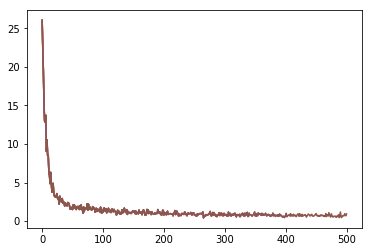

In [90]:
a.train()